# Data Modeling (Using Sklearn and StatsModels)

### Packages use for Analysis

In [2]:
import re
import pandas as pd
import matplotlib.pyplot
import collections
from collections import Counter
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn import preprocessing, linear_model, pipeline, metrics
% pylab inline


/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


### Import Cleaned Data

In [3]:
df=pd.read_csv('data/Step3_output_clean_df.csv')


### Extract Columns required for Analysis: 

In [4]:
cleaned_df = df[[
    'price', 'milage', 'Highway_MPG', 'make', 'body_style', 'fuel', 'State',
    'ext_color', 'int_color', 'Num_Cyl', 'Cyl_Volume', 'year', 'Region'
]]

### Data Exploration (EDA)

In [5]:
state_sum=cleaned_df.groupby(['State','make'])['price'].count().sort_values(ascending=False)
state_sum_df=state_sum.to_frame().reset_index()

state_graph=state_sum_df.groupby(['State']).head(3)
state_graph2=state_graph[state_graph.price>50]


(array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.]),
 <a list of 7 Text yticklabel objects>)

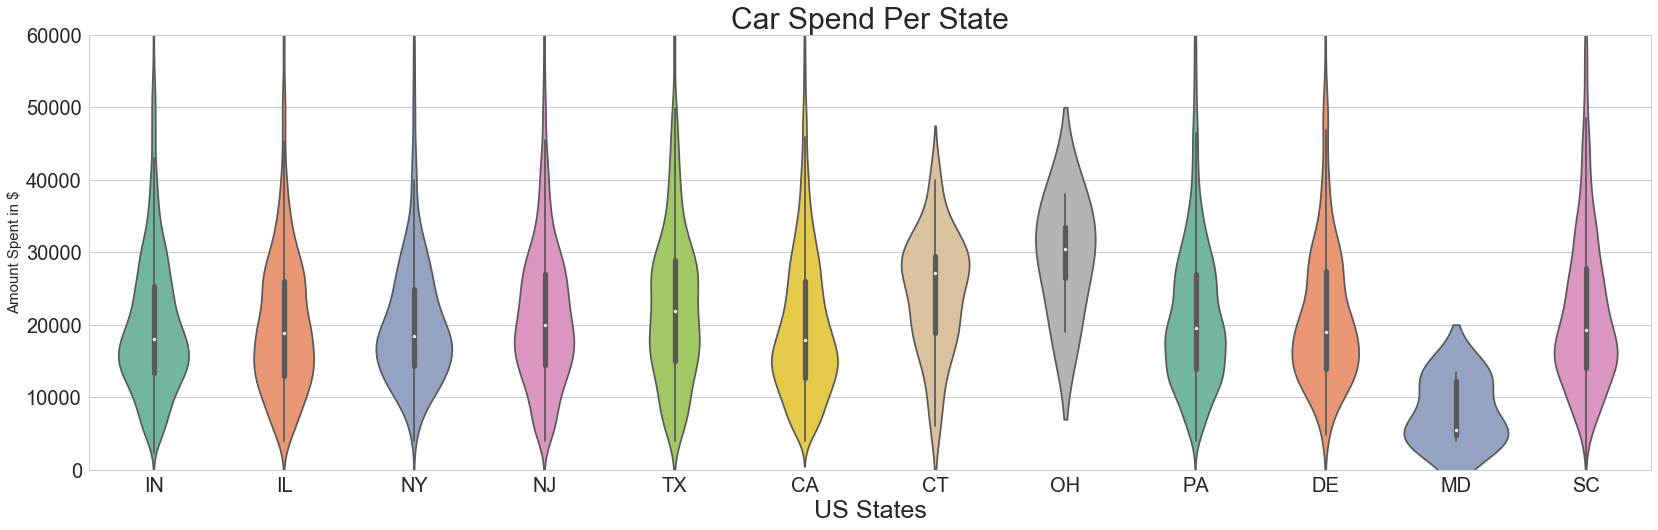

In [6]:
graph_data2=cleaned_df.copy(deep=True)
graph_data=graph_data2[graph_data2.State!='NC']
sns.despine(offset=1, trim=True);
sns.set(style="whitegrid")
plt.figure(figsize=(28,8))
plt.title('Car Spend Per State',fontsize=30)

sns.violinplot(x="State", y="price", data=graph_data,palette="Set2")
# plt.title('Average Spend Per State',fontsize=30)
plt.xlabel('US States',fontsize=25)
plt.ylabel('Amount Spent in $',fontsize=15)
plt.ylim(0,60000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.savefig('img1_violinplots.jpeg')

###  Created a Dataset X (Indipended Variables) and y (Depended Variable) set for Modeling Linear Regression 

In [7]:
sklearn_df=pd.get_dummies(cleaned_df, columns=['make', 'body_style','fuel', 'State','ext_color','int_color','Region','Num_Cyl'],drop_first=True)
sklearn_df.head()
df_sk_y=sklearn_df['price']
df_sk_x=sklearn_df.iloc[:,1:]


### Split the Data into Test and Train Split using Sklearn

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_sk_x, df_sk_y, test_size=0.3)

### Fitted the first linear regression model using StatsModels (R^2 .778)

In [10]:
#OLS MODEL
SM_LinearRegression = sm.OLS(y_train,X_train)
SM_LR_Model=SM_LinearRegression.fit()
SM_LR_Model.summary()   #R^2 .778

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     573.0
Date:                Sun, 29 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:33:02   Log-Likelihood:            -1.8182e+05
No. Observations:               18242   AIC:                         3.638e+05
Df Residuals:                   18134   BIC:                         3.647e+05
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
milage                    -0.0814      0.002    -48.647      0.000      -0.085      -0.078
Highway_MPG             -217.1262     10.913    -19.897      0.000    -238.516    -195.736
Cyl_Volume              2528.3453    124.900     20.243      0.000    2283.529    2773.162
year                    1497.8947     21.036     71.207      0.000    1456.662    1539.127
make_AlfaRomeo          1.227e+04   3670.840      3.343      0.001    5076.072    1.95e+04
make_AstonMartin        1.111e+04   4745.628      2.341      0.019    1809.992    2.04e+04
make_Audi               5511.5055    367.238     15.008      0.000    4791.685    6231.326
make_BMW                5455.2174    330.318     16.515      0.000    4807.763    6102.672
make_Bentley           -3011.9699   3011.192     -1.000      0.317   -8914.192    2890.253
make_Buick             -3933.3539    441.629     -8.906      0.000   -4798.989   -3067.719
make_Cadillac           1483.4716    425.039      3.490      0.000     650.355    2316.588
make_Chevrolet         -4066.7052    320.261    -12.698      0.000   -4694.448   -3438.963
make_Chrysler          -6367.5116    425.149    -14.977      0.000   -7200.845   -5534.179
make_Dodge             -7763.5930    367.915    -21.102      0.000   -8484.741   -7042.445
make_Fiat              -7246.0496    897.094     -8.077      0.000   -9004.439   -5487.660
make_Ford              -3789.2293    314.254    -12.058      0.000   -4405.197   -3173.261
make_GMC               -2557.4034    371.828     -6.878      0.000   -3286.222   -1828.585
make_Genesis            5123.2302   5183.520      0.988      0.323   -5036.961    1.53e+04
make_Honda             -1368.5379    326.465     -4.192      0.000   -2008.440    -728.635
make_Hummer             1253.9741   1717.524      0.730      0.465   -2112.536    4620.484
make_Hyundai           -4776.4211    344.689    -13.857      0.000   -5452.044   -4100.798
make_Infiniti          -1449.9385    401.281     -3.613      0.000   -2236.487    -663.390
make_Jaguar             9265.6494    709.605     13.057      0.000    7874.755    1.07e+04
make_Jeep              -4202.6927    333.346    -12.608      0.000   -4856.082   -3549.303
make_Kia               -6029.9594    371.632    -16.226      0.000   -6758.394   -5301.525
make_LandRover          1.347e+04    525.462     25.639      0.000    1.24e+04    1.45e+04
make_Lexus              2763.5918    347.935      7.943      0.000    2081.606    3445.577
make_Lincoln           -1587.0725    513.510     -3.091      0.002   -2593.600    -580.545
make_Maserati           1.607e+04    718.333     22.374      0.000    1.47e+04    1.75e+04
make_Maybach            1.788e+04   4239.798      4.217      0.000    9566.946    2.62e+04
make_Mazda             -3195.4151    428.294     -7.461      0.000   -4034.911  

### Residual Plot (Linear Regression Model) 

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

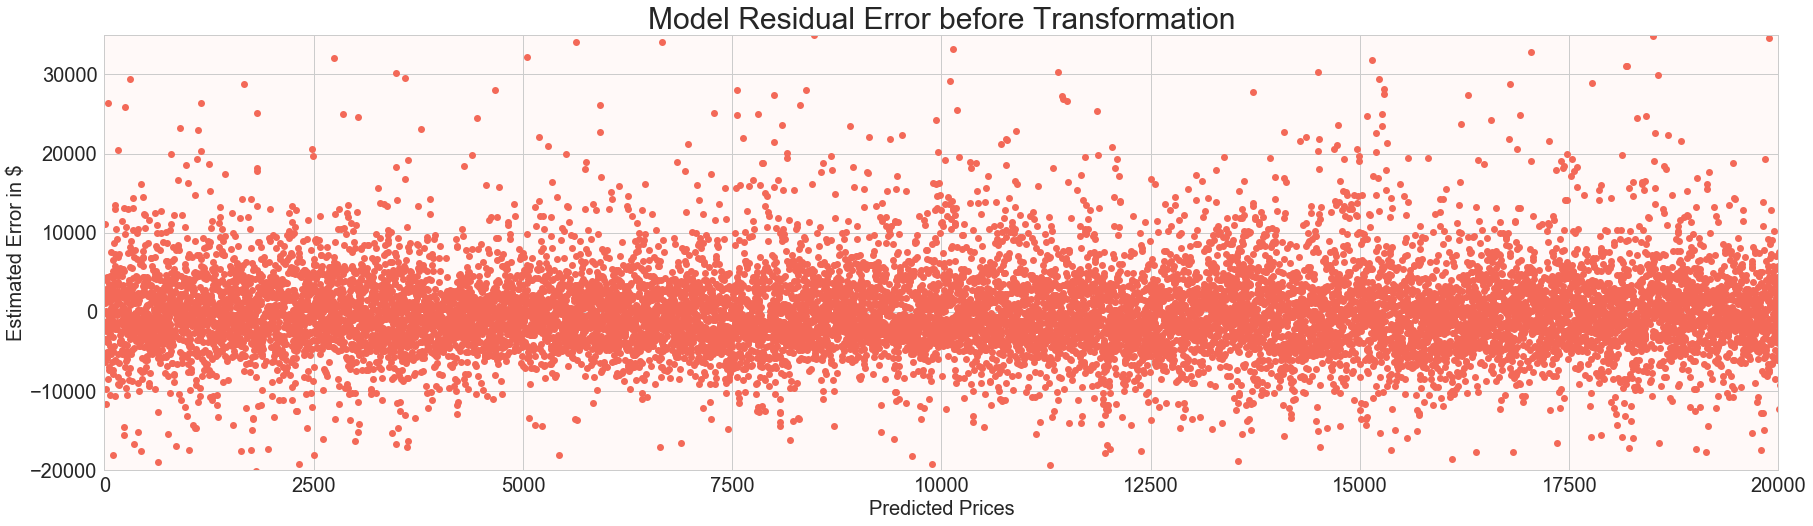

In [11]:
plt.figure(figsize=(15, 4))
plt.subplot(111, facecolor=('#FFF9F8'))
SM_LR_Model.resid.plot(style='o', figsize=(30,8),c=('#F36958'));
plt.title('Model Residual Error before Transformation',fontsize=30)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img2_residualError.jpeg')



## Sklearn Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.77389529958201853

### Test Score

In [13]:
lr.score(X_test,y_test)

0.77366109805229621

### Cross-validation K-Fold with Sklearn

#### Declare Kfolds

In [14]:
k_folds = model_selection.KFold(n_splits=10, shuffle=True)

#### Score model with CrossValidated Data and Average the Scores
* Model performance is stable. 

In [15]:
scores = model_selection.cross_val_score(lr, X_test, y_test, cv=k_folds, scoring='r2')
Avg_Score=np.mean(scores)
Avg_Score

0.7700669224964366

### Lasso Model
* Used lasso to identify features high and low impact features

In [16]:
#Declare Alphas for the Lasso Model. 
#Alphas correspond to the penelty for each coef that increases the RMSE.
#Described by the Cost Function
alphas2 = [1e-3, 1e-2, 0, 1e-4]

#### Creaste the Lasso Model

In [17]:
#create the model 
LM_Lasso = linear_model.LassoCV(alphas=alphas2, normalize=True, cv=10)
LM_Lasso

LassoCV(alphas=[0.001, 0.01, 0, 0.0001], copy_X=True, cv=10, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

#### Fit the Lasso Model

In [18]:
#fit the model
LM_Lasso.fit(X_train, y_train)

/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/honeybadger4/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[0.001, 0.01, 0, 0.0001], copy_X=True, cv=10, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=True, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [19]:
# Score the model. 
LM_Lasso.score(X_test, y_test)

0.77369158667409799

#### High Impact Variables as presented by the lasso model. 

Text(0.5,0,'Features')

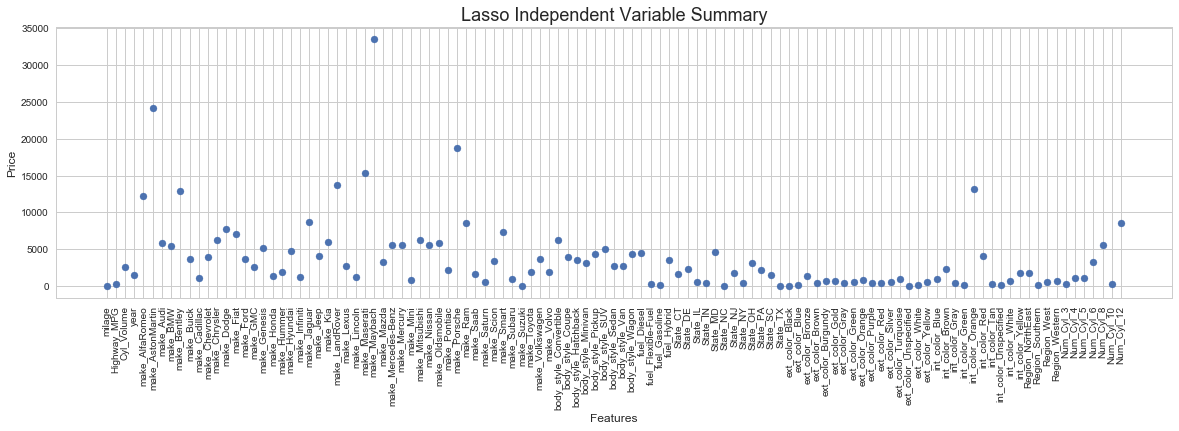

In [20]:
#Visualize the model. See the top influencers
plt.figure(figsize=(20,5))
plt.scatter(np.arange(len(LM_Lasso.coef_)), np.abs(LM_Lasso.coef_))
plt.xticks(np.arange(len(LM_Lasso.coef_)), X_test.columns, rotation=90);
# LM_Lasso.coef_  #See the Coef's
plt.title('Lasso Independent Variable Summary',fontsize=18)
plt.ylabel('Price',fontsize=12)
plt.xlabel('Features',fontsize=12)
# plt.savefig('img4_coef_lasso.jpeg')

### Depended Variable Distribution:
* Right Skewed, needs scaling to achieve normal distribution. 

(array([  0.00000000e+00,   1.00000000e-05,   2.00000000e-05,
          3.00000000e-05,   4.00000000e-05,   5.00000000e-05]),
 <a list of 6 Text yticklabel objects>)

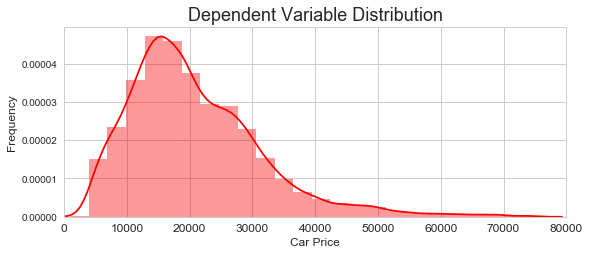

In [21]:
# X_train_sk1, y_train_sk1
plt.figure(figsize=(9, 3.5))
sns.distplot(y_train,bins=25,color='red')
plt.title('Dependent Variable Distribution',fontsize=18)

plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Car Price',fontsize=12)
plt.xlim(0,80000)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
# plt.savefig('img3_hist1.jpeg')

### Model 2 SK Learn OSL/Pipeline with Preprocessing


In [22]:
from sklearn import pipeline, feature_selection, model_selection, linear_model, preprocessing
# Preprocessing Pipeline
select_pipe = pipeline.Pipeline(
    # some features have missing values so this fills in the mean for them
    # this imputer is lazy and often helpful but not always the best option
    [("imp", preprocessing.Imputer()), 
     # scale our features before linear models. it's good data hygiene 
#      ("std", preprocessing.StandardScaler()),
#      we'll use select k best to adjust model complexity
#      ("select",
#       feature_selection.SelectKBest(
#           score_func=feature_selection.f_regression)), 
     ("lin", linear_model.LinearRegression())
    ])

#### Test Score

In [23]:
select_pipe.fit(X_train,y_train)
select_pipe.score(X_train,y_train)
select_pipe.score(X_test,y_test)

0.77366109805229621

In [24]:
# Intercept
select_pipe.named_steps["lin"].intercept_

-3004484.0062485547

In [25]:
predict_y_train=select_pipe.predict(X_train)

### Residual Error Calculation: actual - predicted (Linear Model SKlearn)

In [26]:
residual_error=y_train - predict_y_train

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

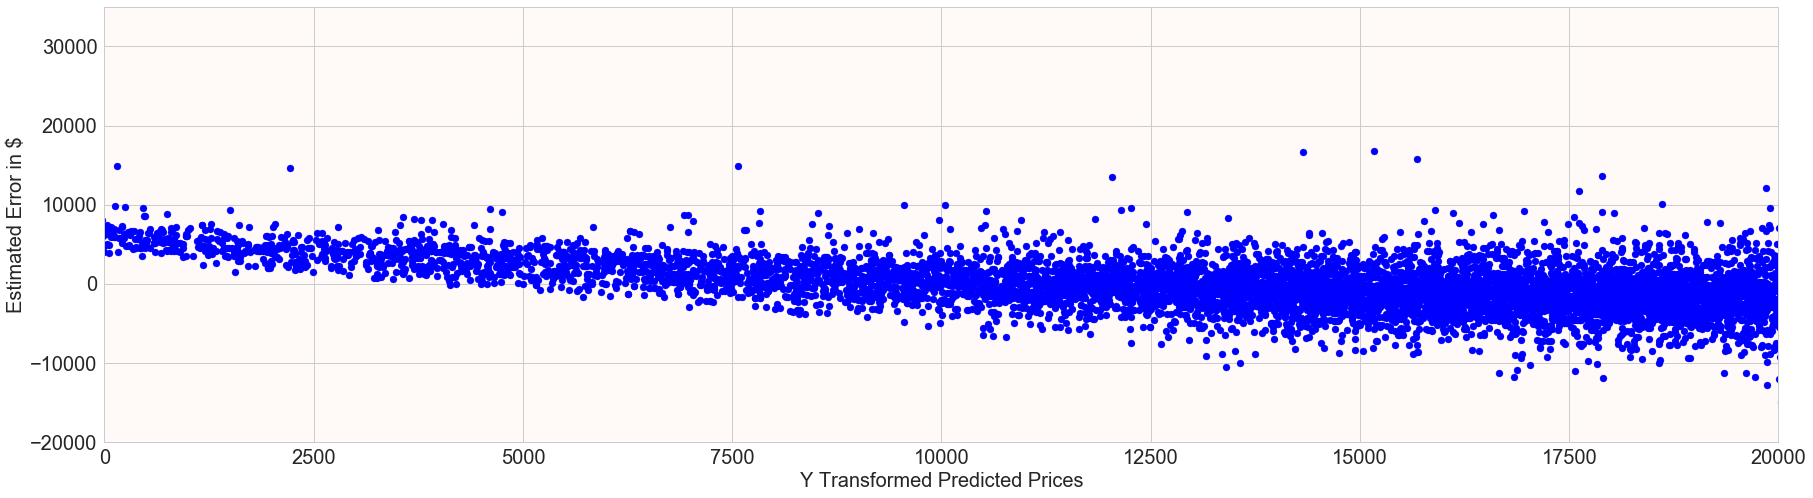

In [27]:
#Visualize the error: 
plt.figure(figsize=(30, 8))
plt.xlim(2000, 20000)  
plt.subplot(facecolor=('#FFF9F8'))
plt.scatter(predict_y_train, residual_error,c='blue')
# plt.title('Model Residual Error after Transformation',fontsize=30)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Y Transformed Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img5_Residsklearn.jpeg')




Text(0,0.5,'Ordered Values')

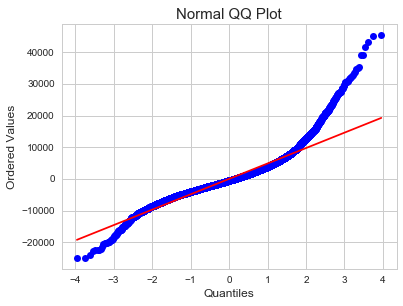

In [28]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual_error, dist="norm", plot=plt)
plt.title('Normal QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=12)
# plt.savefig('img6_QQ1.jpeg')



### Model 3 Tranformed (Log Transformed Linear Regression Model) 

In [29]:
# Was able to achieve a normal bell curve for Y axis, eliminating the right skew. 
# Task : Transform the y
log_y_train=log(y_train)
log_y_test=log(y_test)


#### Visualize Y Transformed Distribution: 

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 <a list of 10 Text yticklabel objects>)

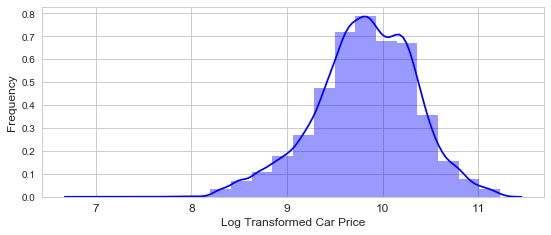

In [30]:
#Dist plot is a combination of Histogram and PMF combined. 
plt.figure(figsize=(9, 3.5))
sns.distplot(log_y_train,bins=20,color='blue')
# plt.title('Log Transformed Y Distribution',fontsize=18)

plt.ylabel('Frequency',fontsize=12)
plt.xlabel('Log Transformed Car Price',fontsize=12)
# plt.xlim(0,80000)

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
# plt.savefig('img7_hist_transformed.jpeg')

#### Model The Y Transformed using the Pipeline

In [31]:
model_log = select_pipe.fit(X_train,log_y_train)
model_log.score(X_train,log_y_train)

0.87391696450139378

#### Score y-trasformed model using the testing data

In [32]:
model_log.score(X_test,log_y_test)

0.86864896970413441

In [33]:
# Check the new intercept: 
model_log.named_steps["lin"].intercept_

-167.43421926755582

#### Backtransfrom to see the new Residual Error Log

In [34]:
#Step 1: Predict the new log y
y_pred_log_test=model_log.predict(X_test)
#Step 2: Exponentiate the results. 
y_pred_log_test_exp=exp(y_pred_log_test)
#Step 3: Subtract Actual - Predicted Y
res_error_log_transformed = y_test -  y_pred_log_test_exp
#Step 4: Plot it. transformed/exp y on x-axis and residual on y-axis. 

#### Plot the New Residual Error: 

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.]),
 <a list of 7 Text yticklabel objects>)

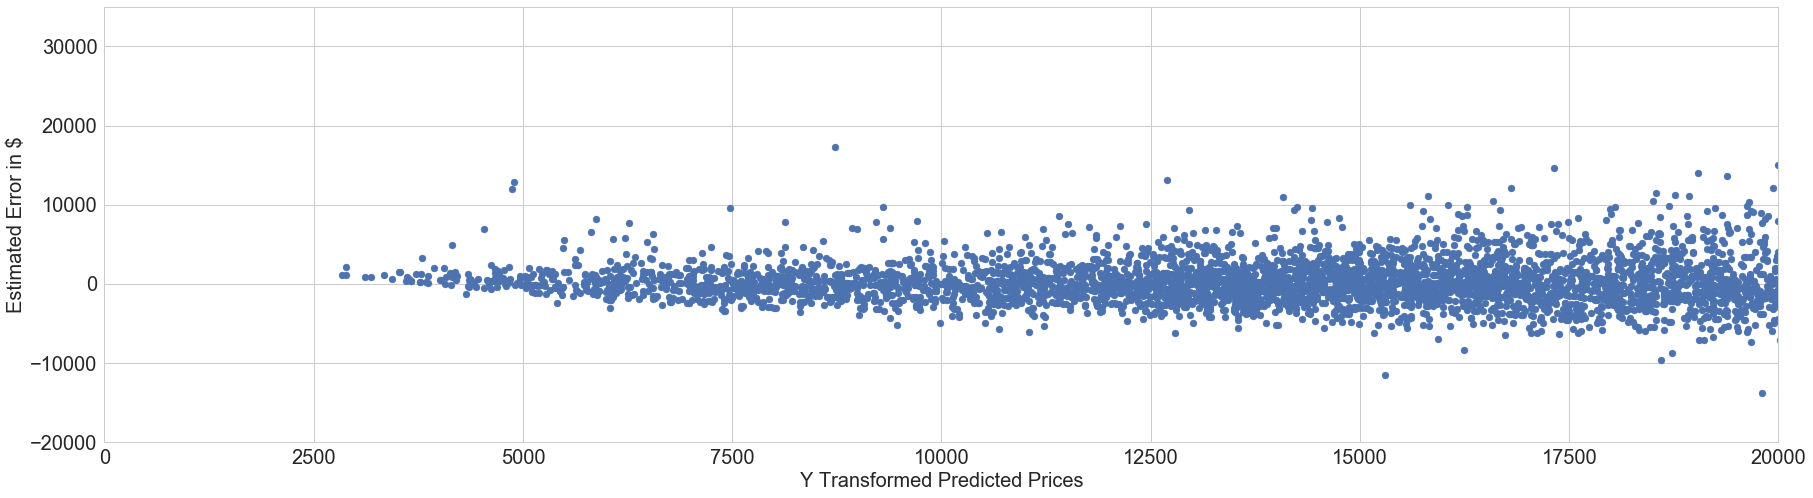

In [35]:
plt.figure(figsize=(30, 8))
plt.scatter(y_pred_log_test_exp,res_error_log_transformed)
plt.ylabel('Estimated Error in $',fontsize=20)
plt.xlabel('Y Transformed Predicted Prices',fontsize=20)
plt.ylim(-20000,35000)
plt.xlim(0,20000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig('img8_ResidPretransformed.jpeg')
#As Seen in the figure below. The error has imporved drastically. 

### Model 3 Backtransformed Score

In [36]:
# train_score_transformed=metrics.r2_score(y_train,exp(y_pred_log_train))
test_score_transformed=metrics.r2_score(y_test,y_pred_log_test_exp)
print(test_score_transformed)


0.824705185559


In [37]:
residual_error_log_test=log_y_test - y_pred_log_test

### Visualize the Log trasnformed Distribution QQ plot for residual Errors: 

Text(0,0.5,'Ordered Values')

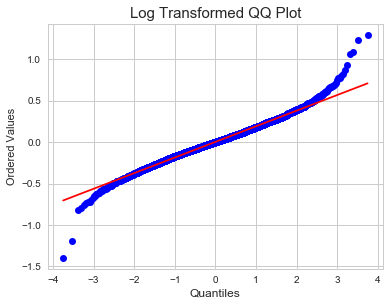

In [38]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual_error_log_test, dist="norm", plot=plt)
plt.title('Log Transformed QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=11)

# plt.savefig('img_9_qq2_transformed.jpeg')